In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Trying out with a sample image </h4>

In [2]:
img = cv2.imread("./test images/virat.jpeg")
img.shape

(234, 410, 3)

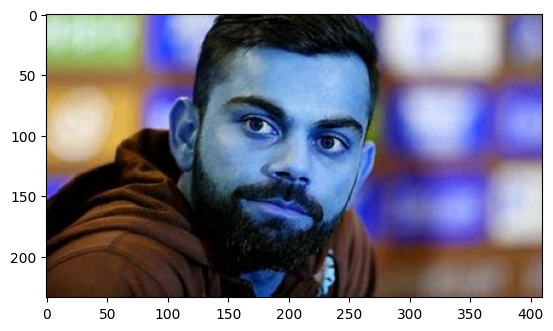

In [3]:
plt.imshow(img)

In [4]:
gray_virat = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_virat.shape

(234, 410)

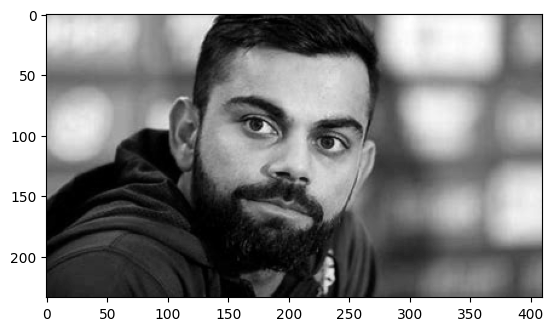

In [5]:
plt.imshow(gray_virat, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray_virat, 1.3, 5)
faces      #returns an array of array with 4 values(x-axis, y-axis, width and height)

array([[115,  31, 174, 174]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(115, 31, 174, 174)

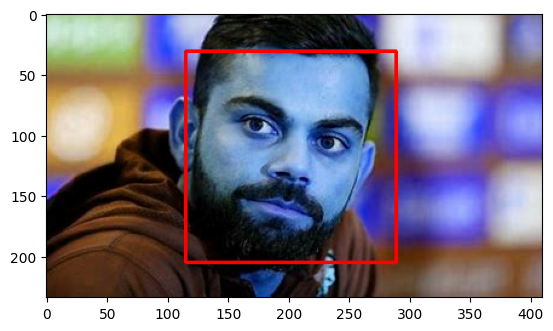

In [8]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

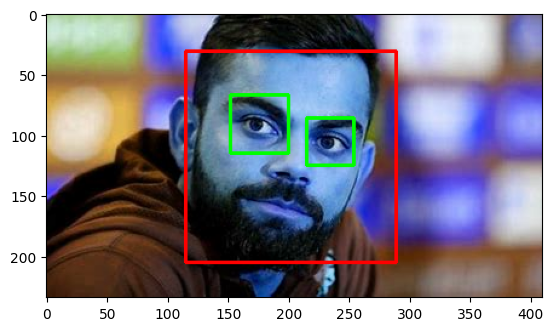

In [9]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces: 
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray_virat[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

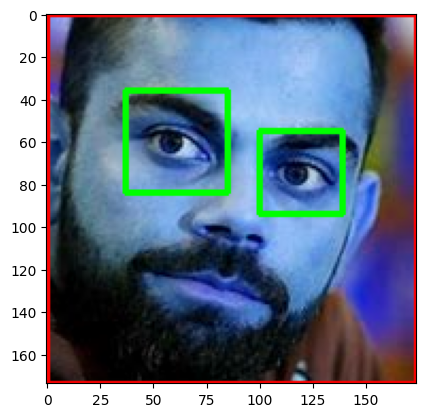

In [10]:
plt.imshow(roi_color, cmap='gray')

<h3> A function to get a cropped image</h3>

In [25]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")


# A function to take image as imput an return a cropped image where both the eyes are clearly visible
def get_cropped_img_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    except:
        return None
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

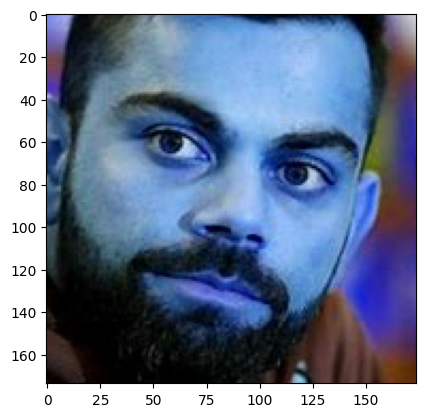

In [13]:
cropped_img = get_cropped_img_if_2_eyes("./test images/virat.jpeg")
plt.imshow(cropped_img)

In [14]:
path_to_datasets = "./datasets/"
path_to_cropped_datasets = "./datasets/cropped/"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_datasets):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./datasets/mohomad shami',
 './datasets/ms dhoni',
 './datasets/rohit sharma',
 './datasets/sachin tendulkar',
 './datasets/virat kohli']

In [22]:
import shutil

if os.path.exists(path_to_cropped_datasets):
    shutil.rmtree(path_to_cropped_datasets)

os.mkdir(path_to_cropped_datasets)

<H4>Making a folder for cropped images</H4>

In [37]:
cropped_img_dirs = []
cricketer_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    cricketer_name = img_dir.split('/')[-1]
    print(cricketer_name)

    cricketer_file_names_dict[cricketer_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_datasets + cricketer_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped folder: ", cropped_folder)
                
            cropped_file_name = cricketer_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            cricketer_file_names_dict[cricketer_name].append(cropped_file_path)
            count += 1  
    

mohomad shami
ms dhoni
rohit sharma
sachin tendulkar
virat kohli


# Wavelet Function

In [38]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

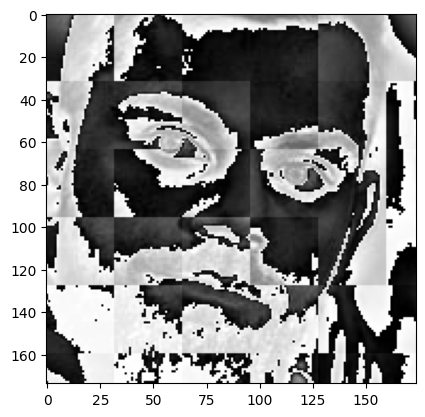

In [39]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [40]:
cricketer_file_names_dict

{'mohomad shami': ['./datasets/cropped/mohomad shami/mohomad shami1.png',
  './datasets/cropped/mohomad shami/mohomad shami2.png',
  './datasets/cropped/mohomad shami/mohomad shami3.png',
  './datasets/cropped/mohomad shami/mohomad shami4.png',
  './datasets/cropped/mohomad shami/mohomad shami5.png',
  './datasets/cropped/mohomad shami/mohomad shami6.png',
  './datasets/cropped/mohomad shami/mohomad shami7.png',
  './datasets/cropped/mohomad shami/mohomad shami8.png',
  './datasets/cropped/mohomad shami/mohomad shami9.png',
  './datasets/cropped/mohomad shami/mohomad shami10.png',
  './datasets/cropped/mohomad shami/mohomad shami11.png',
  './datasets/cropped/mohomad shami/mohomad shami12.png',
  './datasets/cropped/mohomad shami/mohomad shami13.png',
  './datasets/cropped/mohomad shami/mohomad shami14.png',
  './datasets/cropped/mohomad shami/mohomad shami15.png',
  './datasets/cropped/mohomad shami/mohomad shami16.png',
  './datasets/cropped/mohomad shami/mohomad shami17.png',
  './d

In [46]:
class_dict = {}
count = 0
for cricketer_name in cricketer_file_names_dict.keys():
    class_dict[cricketer_name] = count
    count = count + 1
class_dict

{'mohomad shami': 0,
 'ms dhoni': 1,
 'rohit sharma': 2,
 'sachin tendulkar': 3,
 'virat kohli': 4}

In [48]:
import cv2
import numpy as np

X, y = [], []

for cricketer_name, training_files in cricketer_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)

        # Check if image is loaded correctly
        if img is not None:
            # print(img.shape)  # Print shape to verify

            # Proceed with resizing and processing
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img, 'db1', 5)  # Assuming `w2d` is defined elsewhere
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
            X.append(combined_img)
            y.append(class_dict[cricketer_name])

        else:
            continue
            # Handle missing image (e.g., skip, log, or raise an exception)


In [50]:
len(X[0])

4096

In [51]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(231, 4096)

In [52]:
X[0]

array([ 70., 129.,  98., ..., 213., 100., 109.])

# Model Training

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6896551724137931

In [56]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.38      0.43      0.40         7
           2       0.90      0.69      0.78        13
           3       0.78      0.78      0.78        18
           4       0.64      0.82      0.72        11

    accuracy                           0.69        58
   macro avg       0.66      0.65      0.65        58
weighted avg       0.71      0.69      0.69        58



<h3> Using GridCV to try different models with different parameters </h3>

In [57]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [59]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.734622,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.508739,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.694622,{'logisticregression__C': 1}


In [60]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [69]:
# This is the best model so far
best_estimators['svm'].score(X_test,y_test)

0.7758620689655172

In [62]:
best_estimators['random_forest'].score(X_test,y_test)

0.46551724137931033

In [63]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7413793103448276

In [70]:
# saving the best classifier, which is SVM
best_clf = best_estimators['svm']

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  1,  1,  0,  0],
       [ 0,  5,  0,  2,  0],
       [ 2,  0,  9,  0,  2],
       [ 0,  3,  0, 15,  0],
       [ 1,  0,  1,  0,  9]], dtype=int64)

<h5>Confusion Matrix for reference</h5>

Text(95.72222222222221, 0.5, 'Truth')

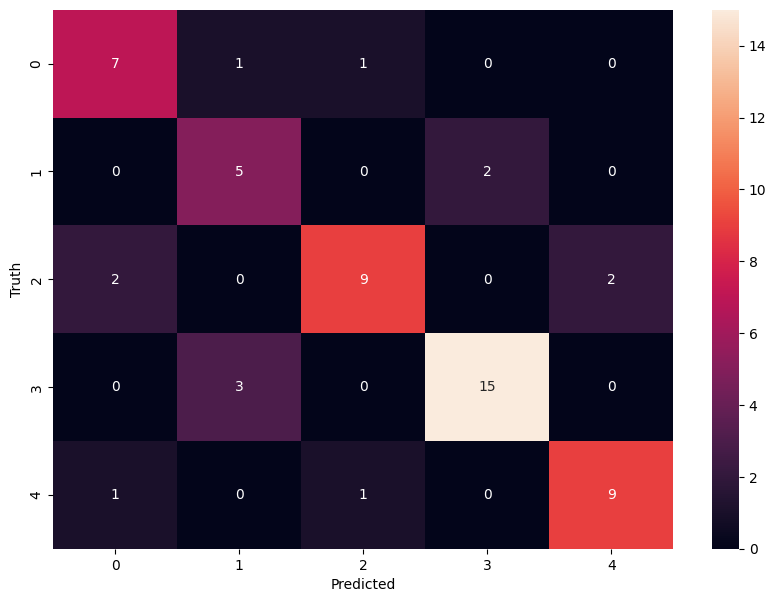

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4>Saving the trained model</h4>

In [67]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [68]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))